In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Police%20deaths%20in%20USA%20from%201791%20to%202022/police_deaths_in_america_v2.csv")

In [19]:
df.head()

,Rank,Name,Cause_of_Death,Date,Year,Month,Day,Department,State,K9_Unit,date
0,Constable,Darius Quimby,Stabbed,"Monday, January 3, 1791",1791,January,Monday,"Albany County Constable's Office, NY",New York,0,3
1,Sheriff,Cornelius Hogeboom,Gunfire,"Saturday, October 22, 1791",1791,October,Saturday,"Columbia County Sheriff's Office, NY",New York,0,22
2,Deputy Sheriff,Isaac Smith,Gunfire,"Thursday, May 17, 1792",1792,May,Thursday,"Westchester County Sheriff's Department, NY",New York,0,17
3,Marshal,Robert Forsyth,Gunfire,"Saturday, January 11, 1794",1794,January,Saturday,United States Department of Justice - United S...,United States,0,11
4,Deputy Sheriff,Robert Berwick,Gunfire,"Thursday, June 29, 1797",1797,June,Thursday,"New York County Sheriff's Office, NY",New York,0,29


In [4]:
df.shape

(26290, 10)

In [5]:
df.columns

Index(['Rank', 'Name', 'Cause_of_Death', 'Date', 'Year', 'Month', 'Day',
       'Department', 'State', 'K9_Unit'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26290 entries, 0 to 26289
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            26290 non-null  object
 1   Name            26290 non-null  object
 2   Cause_of_Death  26290 non-null  object
 3   Date            26290 non-null  object
 4   Year            26290 non-null  int64 
 5   Month           26290 non-null  object
 6   Day             26290 non-null  object
 7   Department      26290 non-null  object
 8   State           26290 non-null  object
 9   K9_Unit         26290 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 2.0+ MB


In [7]:
df.describe()

,Year,K9_Unit
count,26290.000000,26290.000000
mean,1955.765919,0.018524
std,41.274095,0.134840
min,1791.000000,0.000000
25%,1924.000000,0.000000
50%,1957.000000,0.000000
75%,1990.000000,0.000000
max,2022.000000,1.000000


In [20]:
import re
def get_day(txt):
    num = re.findall(r'\d+', txt)
    return int(num[0])
df['day'] = df['Date'].apply(get_day)

In [21]:
df.head()

,Rank,Name,Cause_of_Death,Date,Year,Month,Day,Department,State,K9_Unit,date,day
0,Constable,Darius Quimby,Stabbed,"Monday, January 3, 1791",1791,January,Monday,"Albany County Constable's Office, NY",New York,0,3,3
1,Sheriff,Cornelius Hogeboom,Gunfire,"Saturday, October 22, 1791",1791,October,Saturday,"Columbia County Sheriff's Office, NY",New York,0,22,22
2,Deputy Sheriff,Isaac Smith,Gunfire,"Thursday, May 17, 1792",1792,May,Thursday,"Westchester County Sheriff's Department, NY",New York,0,17,17
3,Marshal,Robert Forsyth,Gunfire,"Saturday, January 11, 1794",1794,January,Saturday,United States Department of Justice - United S...,United States,0,11,11
4,Deputy Sheriff,Robert Berwick,Gunfire,"Thursday, June 29, 1797",1797,June,Thursday,"New York County Sheriff's Office, NY",New York,0,29,29


In [22]:
df.columns

Index(['Rank', 'Name', 'Cause_of_Death', 'Date', 'Year', 'Month', 'Day',
       'Department', 'State', 'K9_Unit', 'date', 'day'],
      dtype='object')

In [23]:
def figure_size():
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)
    font = {'family' : 'normal','size'   : 13}

In [24]:
ranks = df.groupby(['Rank']).size().sort_values(ascending = False).reset_index().rename(columns = {0:'Counts'})
ranks.head(10)

,Rank,Counts
0,Patrolman,3876
1,Police Officer,3552
2,Deputy Sheriff,3230
3,Officer,1746
4,Sergeant,1424
5,Detective,862
6,Trooper,857
7,Sheriff,775
8,Chief of Police,691
9,Constable,589


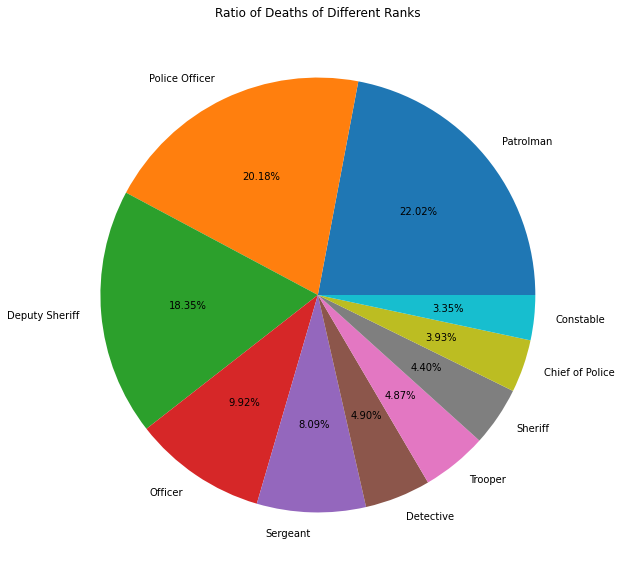

In [25]:
figure_size()
plt.title('Ratio of Deaths of Different Ranks')
plt.pie(x = 'Counts',labels = 'Rank', data = ranks[:10],autopct='%1.2f%%')
plt.show()

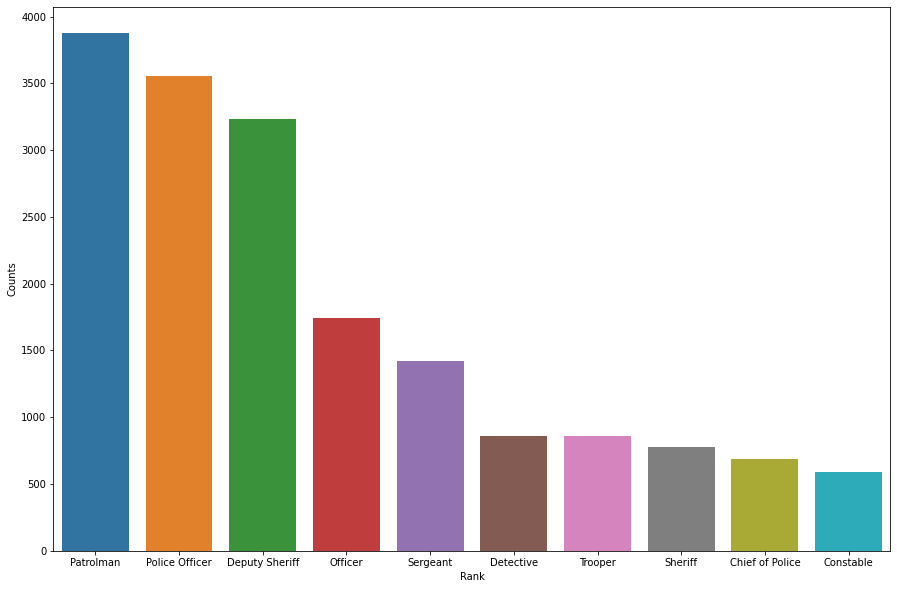

In [26]:
figure_size()
sns.barplot(x=ranks.Rank[:10],y = ranks.Counts[:10]);
plt.show()

In [27]:
ax2= px.treemap(df,path=["Rank"],title="Rank With the Most Deaths")
ax2.show()

In [28]:
causes_of_deaths = df['Cause_of_Death'].value_counts()
causes_of_deaths.head(10)

Gunfire                  13118
Automobile crash          2571
Heart attack              1216
Motorcycle crash          1167
Vehicular assault         1001
Struck by vehicle          986
COVID19                    771
Assault                    712
Vehicle pursuit            693
Gunfire (Inadvertent)      693
Name: Cause_of_Death, dtype: int64

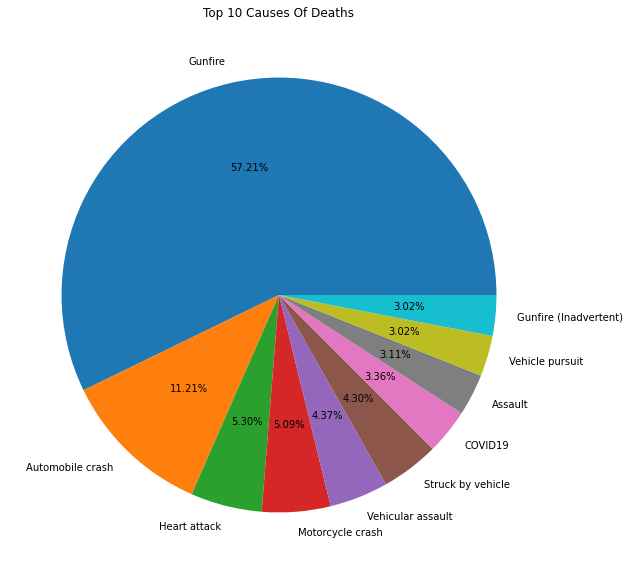

In [29]:
figure_size()
plt.pie(x = causes_of_deaths.values[:10],labels =causes_of_deaths.index[:10],autopct='%1.2f%%')
plt.title('Top 10 Causes Of Deaths')
plt.show()

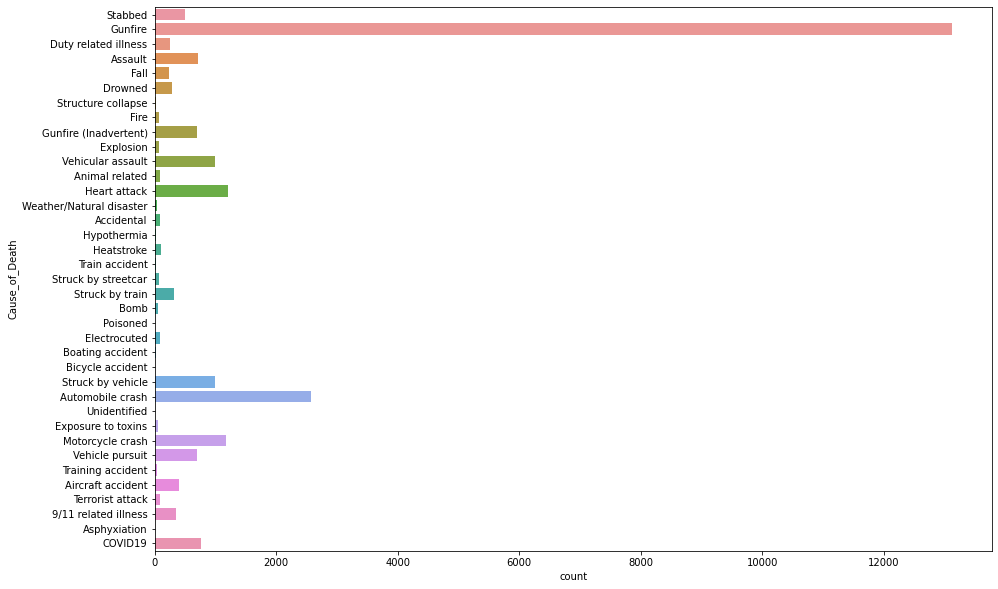

In [30]:
figure_size()
sns.countplot(y= df.Cause_of_Death)
plt.show()

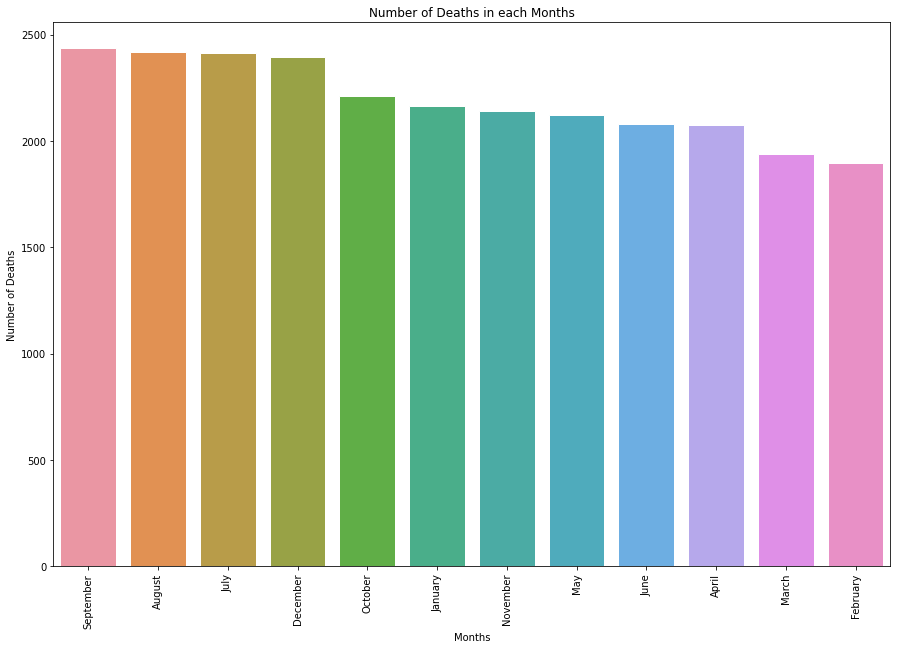

In [31]:
deaths_in_months = df.groupby(['Month']).size().sort_values(ascending = False).reset_index().rename(columns = {0:'counts'})
figure_size()
plt.title("Number of Deaths in each Months")
sns.set_style("darkgrid")
a=sns.barplot(x = 'Month',y = 'counts' , data =deaths_in_months);
a.set_xticklabels(deaths_in_months.Month ,rotation=90)
a.set(xlabel='Months', ylabel='Number of Deaths')
plt.show()

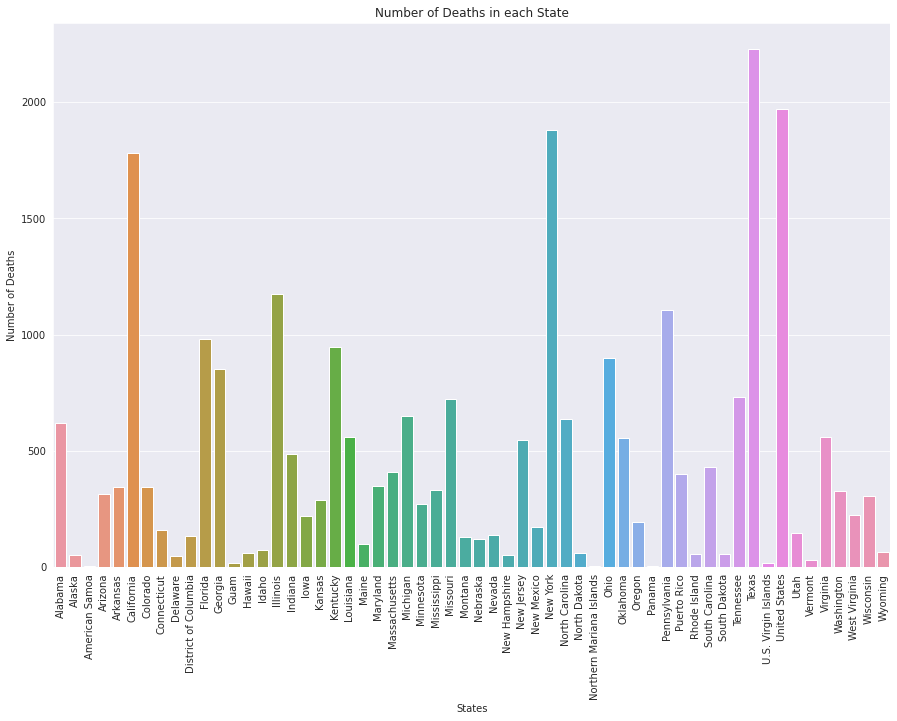

In [32]:
states = df.groupby(['State']).size().reset_index().rename(columns = {0:"Counts"})
figure_size()
plt.title("Number of Deaths in each State")
sns.set_style("darkgrid")
a=sns.barplot(x = 'State',y = 'Counts' , data =states);
a.set_xticklabels(states.State ,rotation=90)
a.set(xlabel='States', ylabel='Number of Deaths')
plt.show()

ax3= px.treemap(df,path=["State"],title="State With the Most Deaths")
ax3.show()

In [33]:
days = df.groupby('Day').size().reset_index().sort_values(by = 0,ascending = False)
days

,Day,0
2,Saturday,4070
0,Friday,3849
3,Sunday,3833
4,Thursday,3732
5,Tuesday,3619
1,Monday,3607
6,Wednesday,3580


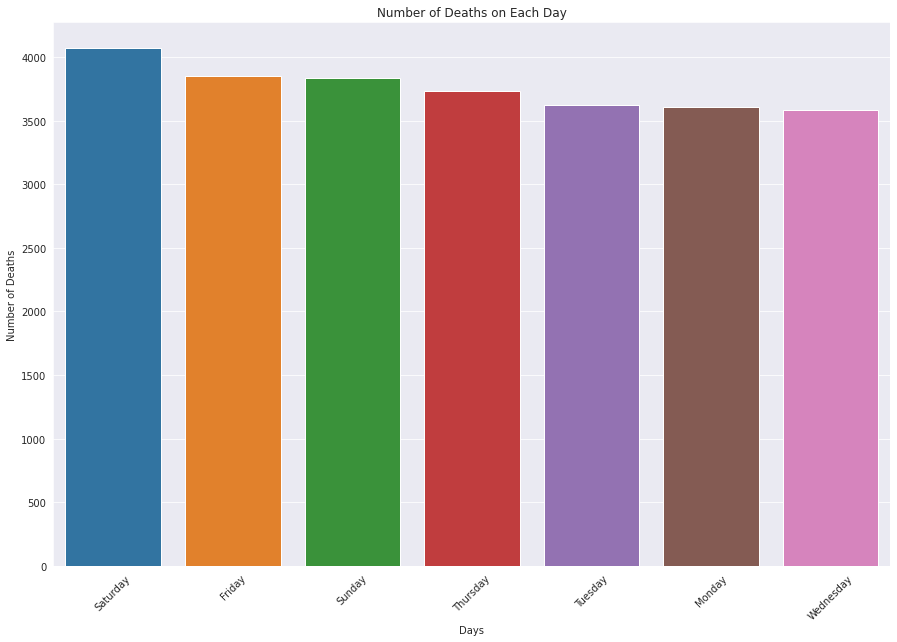

In [34]:
figure_size()
plt.title("Number of Deaths on Each Day")
sns.set_style("darkgrid")
a=sns.barplot(x = 'Day',y = 0 , data =days);
a.set_xticklabels(days.Day ,rotation=45)
a.set(xlabel='Days', ylabel='Number of Deaths')
plt.show()

In [35]:
deaths_Covid = df[df['Cause_of_Death']== 'COVID19'].groupby('Rank').size().reset_index().sort_values(by = 0,ascending = 0).rename(columns = {0:'counts'})
deaths_Covid.head(10)

,Rank,counts
108,Sergeant,107
88,Police Officer,106
50,Deputy Sheriff,84
69,Lieutenant,41
24,Correctional Officer,36
79,Officer,33
53,Detective,32
36,Corrections Officer,23
18,Corporal,22
39,Corrections Officer V,22


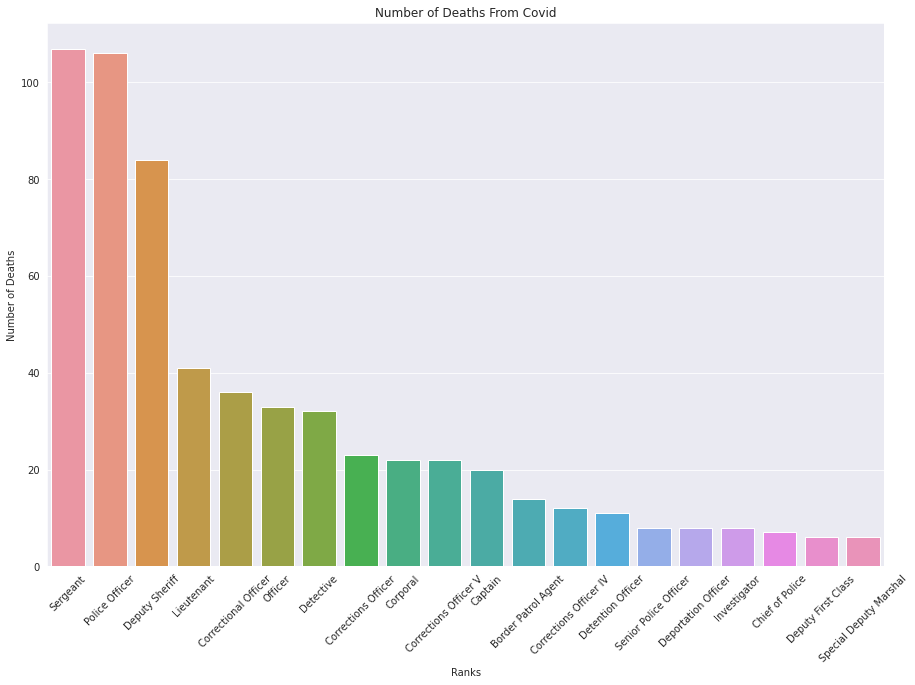

In [37]:
figure_size()
plt.title("Number of Deaths From Covid")
sns.set_style("darkgrid")
a=sns.barplot(x = 'Rank',y = 'counts' , data =deaths_Covid[:20]);
a.set_xticklabels(deaths_Covid.Rank[:20] ,rotation=45)
a.set(xlabel='Ranks', ylabel='Number of Deaths')
plt.show()

In [38]:
 year = df.groupby(['Year']).size().reset_index().rename(columns = {0:"counts"})
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(year.Year), y=list(year.counts)))

# Set title
fig.update_layout(
    title_text="No of Deaths Over the Years"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [39]:
year_group = df.groupby('Year')['Name'].count()
year_group

Year
1791      2
1792      1
1794      1
1797      2
1798      1
       ... 
2018    216
2019    186
2020    436
2021    643
2022    142
Name: Name, Length: 210, dtype: int64

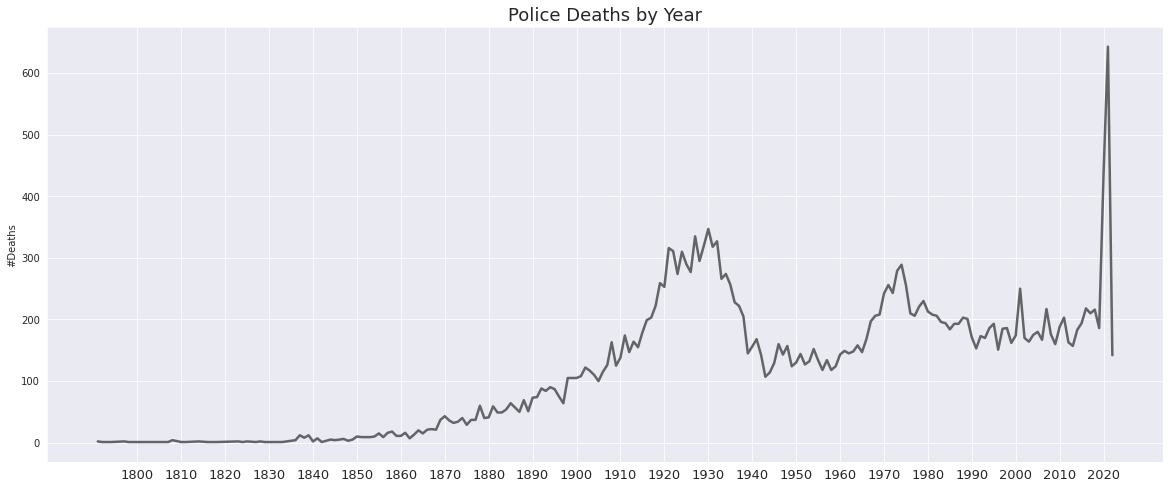

In [40]:
year_group = df.groupby('Year')['Name'].count()

plt.rcParams['figure.figsize'] = (20, 8)
sns.lineplot(x=year_group.index, y=year_group.values, data = year_group, linewidth = 2.5, color = '#626567')

plt.title("Police Deaths by Year", fontsize = 18)

plt.xlabel(None)
plt.ylabel('#Deaths')

plt.xticks(range(1800,2022,10), fontsize = 13)
plt.show()